# r book

In [349]:
library(lubridate)
library(tidyverse)
library(dplyr)
library(ggplot2)
library(linelist)

In [350]:
df <- read.csv("https://raw.githubusercontent.com/Cbhami/Coraline/master/Resources/csv%20data/user94403143_workout_history.csv", header=TRUE)

In [351]:
nrow(df)

[1] 703

In [352]:
head(df, 1)

,Date.Submitted,Workout.Date,Activity.Type,Calories.Burned..kCal.,Distance..mi.,Workout.Time..seconds.,Avg.Pace..min.mi.,Max.Pace..min.mi.,Avg.Speed..mi.h.,Max.Speed..mi.h.,Avg.Heart.Rate,Steps,Notes,Source,Link
,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>
1,"July 18, 2022","July 18, 2022",Run,1175,9.00279,5709,10.5677,0.46046,5.67767,130.304,143,14918,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6720217687


In [353]:
# df <- separate(data = df, col = Date.Submitted, into = c("left", "middle", "right"), sep = " ")

In [354]:
write.csv(df, "user94403143_workout_history_clean.csv")

In [355]:
summary(df)

 Date.Submitted     Workout.Date       Activity.Type     
 Length:703         Length:703         Length:703        
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  
                                                         
                                                         
                                                         
                                                         
 Calories.Burned..kCal. Distance..mi.    Workout.Time..seconds.
 Min.   :   0.0         Min.   : 0.000   Min.   :    0         
 1st Qu.: 228.0         1st Qu.: 1.998   1st Qu.: 1454         
 Median : 403.0         Median : 3.100   Median : 1800         
 Mean   : 399.6         Mean   : 3.089   Mean   : 2406         
 3rd Qu.: 452.0         3rd Qu.: 3.515   3rd Qu.: 2330         
 Max.   :2473.0         Max.   :13.482   Max.   :80568         
                                                               
 Avg.Pace..min.mi. Max.P

In [356]:
df <- data.frame(df)

In [357]:
nrow(df)

[1] 703

In [358]:
df['duration'] <- df['Workout.Time..seconds.'] / 60

In [359]:
#determine your working library
getwd()

[1] "c:/Users/coleb/OneDrive/Coraline/MapMyRunProjects"

In [360]:
#download your file
#download.file("https://raw.githubusercontent.com/Cbhami/Coraline/master/Resources/csv%20data/user94403143_workout_history.csv", "user94403143_workout_history.csv")

In [361]:
#run_data <- read.csv("user94403143_workout_history.csv", header=TRUE)
run_data <- data.frame(df)

In [362]:
# df %>% mutate(Workout.date = Workout.Date %>% as.Date("%B %d, %Y"), left = month(Workout.Date, abbr = FALSE, label = TRUE))

In [363]:
# #convert the datetime variables using the following logic:
# #%B is a complete month name (November), %e is a day of the month (3) preceded by a space and followed by a comma and a space, and %Y is a four-digit year (2020).
# df$Workout.Date <- as.Date(df$Workout.Date, format = "%B %e, %Y")
# df$Date.Submitted <- as.Date(df$Date.Submitted, format = "%B %e, %Y")

In [364]:
library(lubridate)
library(tidyverse)

df <- df %>% mutate(Workout.Date=mdy(Workout.Date))

In [365]:
head(df, 1)

,Date.Submitted,Workout.Date,Activity.Type,Calories.Burned..kCal.,Distance..mi.,Workout.Time..seconds.,Avg.Pace..min.mi.,Max.Pace..min.mi.,Avg.Speed..mi.h.,Max.Speed..mi.h.,Avg.Heart.Rate,Steps,Notes,Source,Link,duration
,<chr>,<date>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>
1,"July 18, 2022",2022-07-18,Run,1175,9.00279,5709,10.5677,0.46046,5.67767,130.304,143,14918,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6720217687,95.15


In [366]:
names(run_data)[names(run_data) == "Workout.Date"] <- "Date"
names(run_data)[names(run_data) == "Date.Submitted"] <- "Date.Sub"
names(run_data)[names(run_data) == "Workout.Time..seconds."] <- "Duration"
names(run_data)[names(run_data) == "Distance..mi."] <- "Distance"
names(run_data)[names(run_data) == "minutes"] <- "minutes"
names(run_data)[names(run_data) == "Activity.Type"] <- "Activity"
names(run_data)[names(run_data) == "Avg.Pace..min.mi."] <- "Avg.Pace"
names(run_data)[names(run_data) == "Max.Pace..min.mi."] <- "Max.Pace"
names(run_data)[names(run_data) == "Avg.Speed..mi.h."] <- "Avg.Spd"
names(run_data)[names(run_data) == "Avg.Heart.Rate"] <- "Avg.HR"
names(run_data)[names(run_data) == "Max.Speed..mi.h."] <- "Max.Spd"
names(run_data)[names(run_data) == "Calories.Burned..kCal."] <- "Cal.Burned"
head(run_data, 2)

,Date.Sub,Date,Activity,Cal.Burned,Distance,Duration,Avg.Pace,Max.Pace,Avg.Spd,Max.Spd,Avg.HR,Steps,Notes,Source,Link,duration
,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>
1,"July 18, 2022","July 18, 2022",Run,1175,9.00279,5709,10.56770,0.46046,5.67767,130.304,143,14918,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6720217687,95.15
2,"July 17, 2022","July 17, 2022",Run,404,3.10000,1593,8.56452,0.00000,7.00565,0.000,NA,4286,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6719394583,26.55


In [367]:
df <- within(run_data, rm('Link', 'Notes', 'Source'))
#df$minutes <- round(df$minutes, digits = 2)

In [368]:
#df$minutes <- as.numeric(as.character(df$minutes))
df <- df %>% mutate_if(is.numeric, round, digits = 2)

In [369]:
library(dplyr); df %>% mutate_if(is.numeric, round, digits=2)

Date.Sub,Date,Activity,Cal.Burned,Distance,Duration,Avg.Pace,Max.Pace,Avg.Spd,Max.Spd,Avg.HR,Steps,duration
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"July 18, 2022","July 18, 2022",Run,1175,9.00,5709,10.57,0.46,5.68,130.30,143,14918,95.15
"July 17, 2022","July 17, 2022",Run,404,3.10,1593,8.56,0.00,7.01,0.00,NA,4286,26.55
"July 17, 2022","July 16, 2022",Run,405,3.10,1698,9.13,0.00,6.57,0.00,NA,4537,28.30
"July 14, 2022","July 14, 2022",Run,452,3.76,2157,9.56,1.00,6.27,59.92,148,5684,35.95
"July 13, 2022","July 13, 2022",Run,398,3.11,1912,10.25,1.09,5.85,54.80,150,4991,31.87
"July 12, 2022","July 12, 2022",Run,421,3.11,1968,10.55,1.07,5.69,56.08,155,5134,32.80
"July 12, 2022","July 11, 2022",Run,197,2.00,1409,11.74,1.91,5.11,31.34,145,3302,23.48
"July 10, 2022","July 10, 2022",Run,429,3.10,2301,12.37,0.99,4.85,60.41,149,5125,38.35
"July 9, 2022","July 9, 2022",Run,430,3.10,2005,10.77,1.17,5.57,51.45,157,5261,33.42


In [370]:
df <- df %>% drop_na(Date)
# df <- df %>% drop_na(Date.Sub)

In [371]:
nrow(df)

[1] 703

In [372]:
summary(df)

   Date.Sub             Date             Activity           Cal.Burned    
 Length:703         Length:703         Length:703         Min.   :   0.0  
 Class :character   Class :character   Class :character   1st Qu.: 228.0  
 Mode  :character   Mode  :character   Mode  :character   Median : 403.0  
                                                          Mean   : 399.6  
                                                          3rd Qu.: 452.0  
                                                          Max.   :2473.0  
                                                                          
    Distance         Duration        Avg.Pace          Max.Pace      
 Min.   : 0.000   Min.   :    0   Min.   :  0.000   Min.   :  0.000  
 1st Qu.: 2.000   1st Qu.: 1454   1st Qu.:  9.055   1st Qu.:  0.000  
 Median : 3.100   Median : 1800   Median :  9.730   Median :  0.860  
 Mean   : 3.089   Mean   : 2406   Mean   : 13.003   Mean   :  2.080  
 3rd Qu.: 3.515   3rd Qu.: 2330   3rd Qu.: 11.055 

In [373]:
library(data.table)
#setDT(df)[value==0, value := NA,]
#df[, value := replace(value, is.na(value), mean(value, na.rm = TRUE)) , by = .(year, age)]

In [374]:
HRmedian <- median(df$Avg.HR)
Stepsmedian <- median(df$Steps)

In [375]:
library(lubridate)
library(tidyverse)

df <- df %>% mutate(Date=mdy(Date))

In [376]:
# df[is.na(df)] = 0

In [377]:
head(df, 4)

,Date.Sub,Date,Activity,Cal.Burned,Distance,Duration,Avg.Pace,Max.Pace,Avg.Spd,Max.Spd,Avg.HR,Steps,duration
,<chr>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,"July 18, 2022",2022-07-18,Run,1175,9.00,5709,10.57,0.46,5.68,130.30,143,14918,95.15
2,"July 17, 2022",2022-07-17,Run,404,3.10,1593,8.56,0.00,7.01,0.00,NA,4286,26.55
3,"July 17, 2022",2022-07-16,Run,405,3.10,1698,9.13,0.00,6.57,0.00,NA,4537,28.30
4,"July 14, 2022",2022-07-14,Run,452,3.76,2157,9.56,1.00,6.27,59.92,148,5684,35.95


In [378]:
df <- df %>% dplyr::mutate(Avg.HR = ifelse(Avg.HR == 0, HRmedian, Avg.HR))
# #df <- df %>% dplyr::mutate(Avg.HR = ifelse(Avg.HR == NA, HRmean, Avg.HR))
df <- df %>% dplyr::mutate(Steps = ifelse(Steps == 0, Stepsmedian, Steps))
# #df <- df %>% dplyr::mutate(Steps = ifelse(Steps == NA, Stepsmean, Steps))

In [379]:
df[is.na(df)] = 0

In [380]:
# df[df == 0] = NA

In [381]:
df$Avg.HR[is.na(df$Avg.HR)] <- median(df$Avg.HR, na.rm = TRUE)
df$Steps[is.na(df$Steps)] <- median(df$Steps, na.rm = TRUE)
df$Max.Pace[is.na(df$Max.Pace)] <- median(df$Max.Pace, na.rm = TRUE)
df$Avg.Pace[is.na(df$Avg.Pace)] <- median(df$Avg.Pace, na.rm = TRUE)
df$Max.Spd[is.na(df$Max.Spd)] <- median(df$Max.Spd, na.rm = TRUE)
df$Avg.Spd[is.na(df$Avg.Spd)] <- median(df$Avg.Spd, na.rm = TRUE)
df$Cal.Burned[is.na(df$Cal.Burned)] <- median(df$Cal.Burned, na.rm = TRUE)

In [382]:
df$day <- weekdays(as.Date(df$Date))
df$month <- months(as.Date(df$Date))
df$year <- years(as.Date(df$Date))

In [383]:
head(df, 4)

,Date.Sub,Date,Activity,Cal.Burned,Distance,Duration,Avg.Pace,Max.Pace,Avg.Spd,Max.Spd,Avg.HR,Steps,duration,day,month,year
,<chr>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<ord>
1,"July 18, 2022",2022-07-18,Run,1175,9.00,5709,10.57,0.46,5.68,130.30,143,14918,95.15,Monday,July,2022
2,"July 17, 2022",2022-07-17,Run,404,3.10,1593,8.56,0.00,7.01,0.00,0,4286,26.55,Sunday,July,2022
3,"July 17, 2022",2022-07-16,Run,405,3.10,1698,9.13,0.00,6.57,0.00,0,4537,28.30,Saturday,July,2022
4,"July 14, 2022",2022-07-14,Run,452,3.76,2157,9.56,1.00,6.27,59.92,148,5684,35.95,Thursday,July,2022


In [384]:
library(ggplot2)

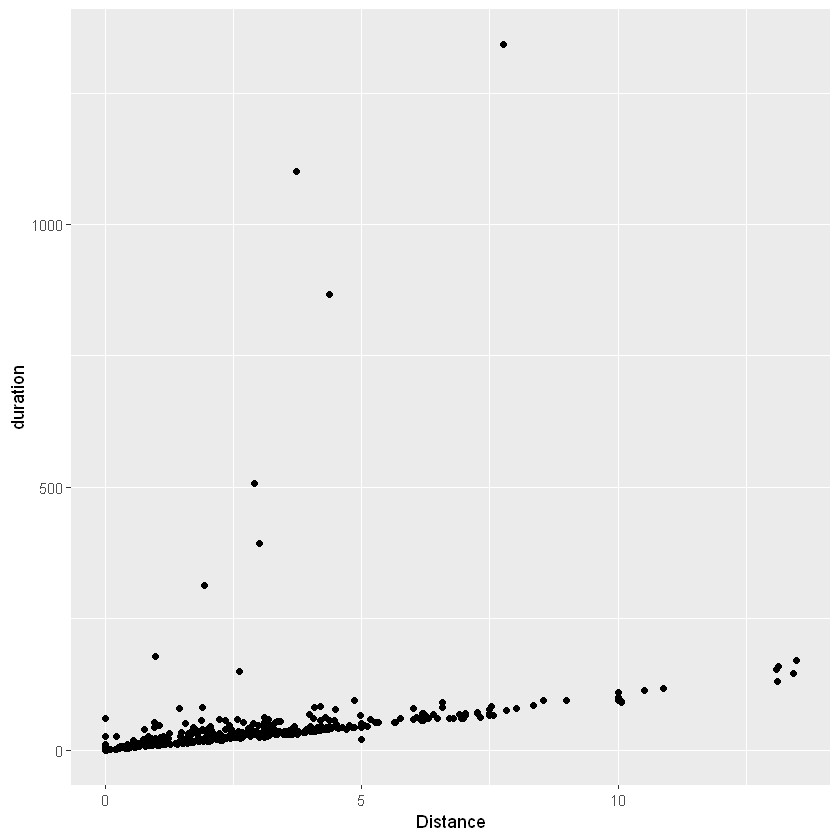

In [385]:
ggplot(data = df, mapping = aes(x = Distance, y = duration)) + 
    geom_point()

In [386]:
#Remove erroneous data (I know I have not run anything over 170 minutes)
df <- df[df$duration < 170,]
df <- df[df$Avg.Spd < 10,]
df <- df[df$Cal.Burned < 2000,]
df <- df[df$Date > '2019-01-01',]

In [387]:
#Create subsets for years 2021 and 2022
df2022 <- df[df$Date.Sub >= "2022-01-01",]
df2021 <- subset(df, Date.Sub < "2022-01-01" & Date.Sub >= "2021-01-01")

In [388]:
df$year <- format(df$Date.Sub, format = "%Y")
df$year <- as.integer(df$year)

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"


In [389]:
tail(df, 4)

,Date.Sub,Date,Activity,Cal.Burned,Distance,Duration,Avg.Pace,Max.Pace,Avg.Spd,Max.Spd,Avg.HR,Steps,duration,day,month,year
,<chr>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>
696,"May 19, 2019",2019-05-19,Run,419,3.11,2197,11.69,2.06,5.13,29.17,139,5295,36.62,Sunday,May,NA
697,"May 15, 2019",2019-05-15,Indoor Run / Jog,403,3.13,2344,12.48,0.00,4.81,0.00,0,6926,39.07,Wednesday,May,NA
698,"May 13, 2019",2019-05-13,Run,258,1.96,1214,10.32,2.67,5.82,22.45,0,3209,20.23,Monday,May,NA
699,"May 13, 2019",2019-05-13,Indoor Run / Jog,191,1.42,927,10.88,17.09,5.51,3.51,158,67,15.45,Monday,May,NA


`geom_smooth()` using method = 'loess' and formula 'y ~ x'

ERROR while rich displaying an object: Error: Continuous value supplied to discrete scale

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj

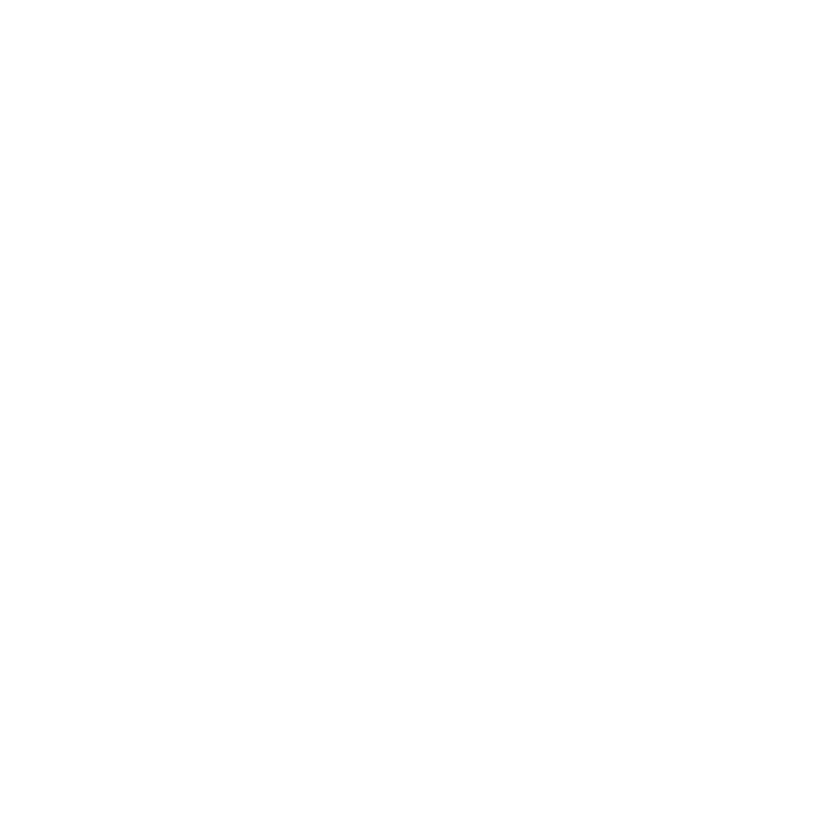

In [390]:
ggplot(data = df, mapping = aes(x = Distance, y = duration, color = month)) + 
    geom_point() + geom_smooth(aes(color = year))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



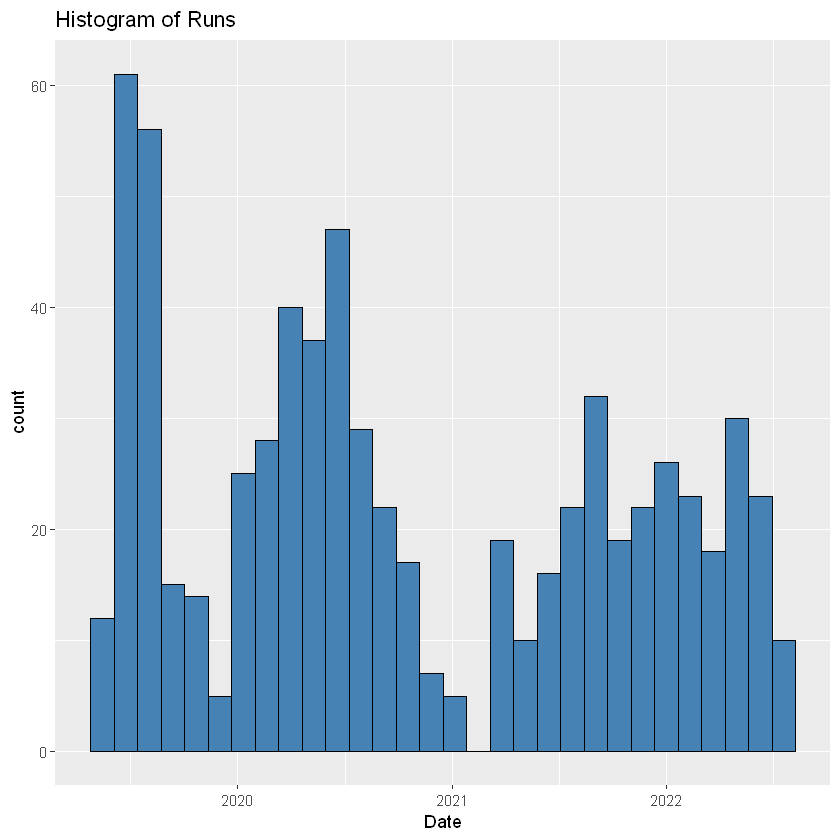

In [391]:
library(ggplot2)
ggplot(data=df, aes(x=Date)) +
  geom_histogram(fill="steelblue", color="black") +
  ggtitle("Histogram of Runs")

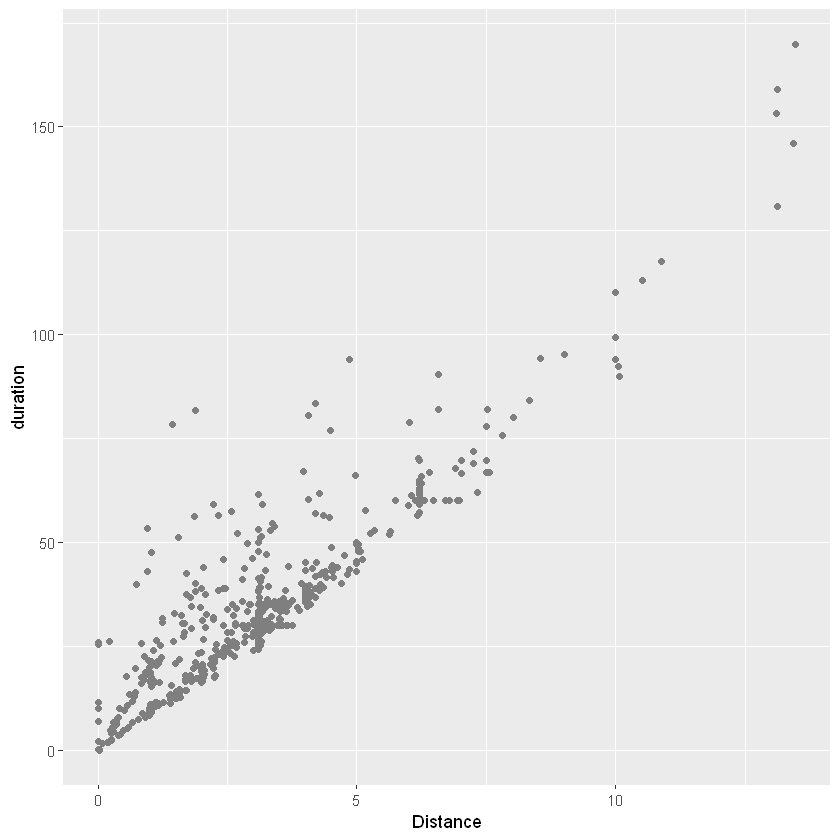

In [392]:
ggplot(data=df, aes(x=Distance, y=duration, color=year)) + 
  geom_point()

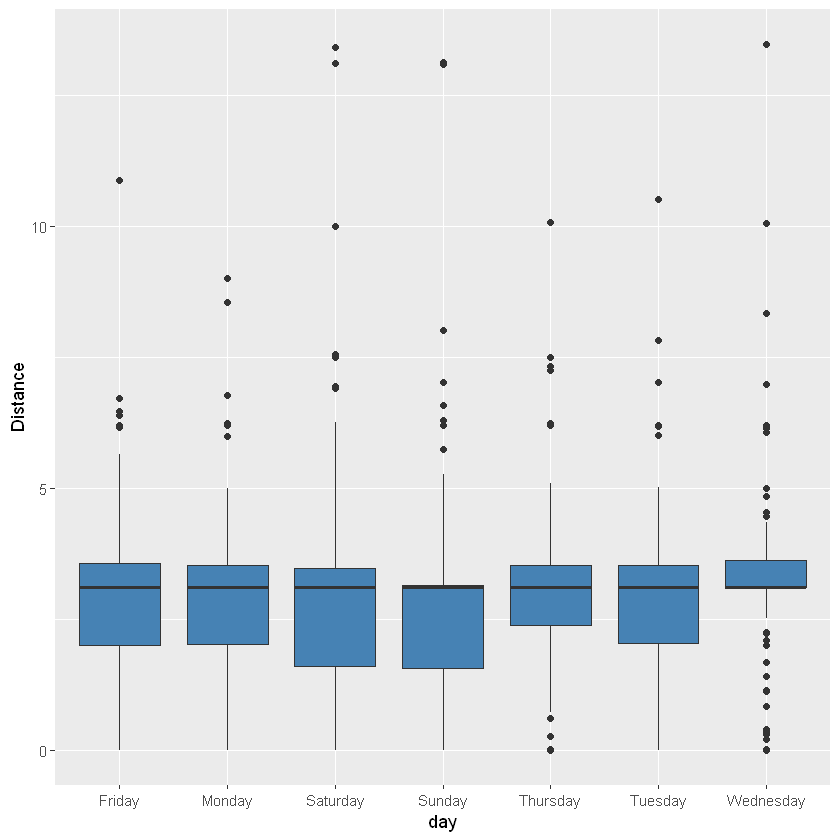

In [393]:
ggplot(data=df, aes(x=day, y=Distance)) + 
  geom_boxplot(fill="steelblue")

In [394]:
df <- df %>% mutate(new_bin = cut(Distance, breaks=c(0, 3.09, 6.21, 13.09, 15)))


In [395]:
names(df)[names(df) == "new_bin"] <- "Miles"

In [396]:
head(df, 1)

,Date.Sub,Date,Activity,Cal.Burned,Distance,Duration,Avg.Pace,Max.Pace,Avg.Spd,Max.Spd,Avg.HR,Steps,duration,day,month,year,Miles
,<chr>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<fct>
1,"July 18, 2022",2022-07-18,Run,1175,9,5709,10.57,0.46,5.68,130.3,143,14918,95.15,Monday,July,NA,"(6.21,13.1]"


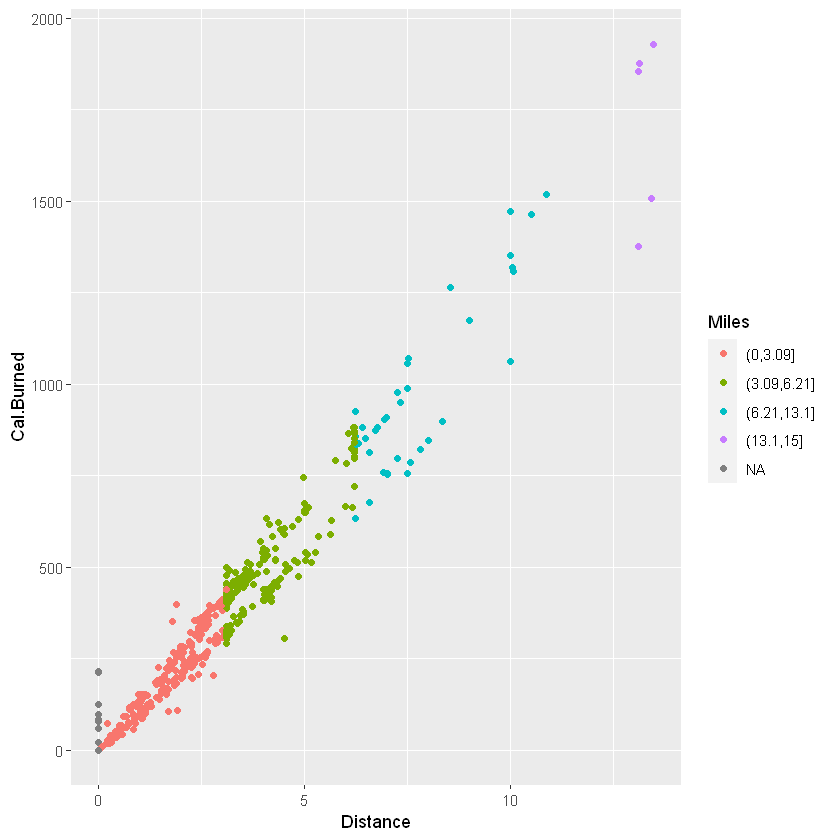

In [397]:
ggplot(data=df, aes(x=Distance, y=Cal.Burned, color=Miles)) + 
  geom_point()

In [398]:
sapply(df, function(x) sum(is.na(x)))
sapply(df, function(x) sum(duplicated(x)))


Date.Sub       Date   Activity Cal.Burned   Distance   Duration   Avg.Pace 
         0          0          0          0          0          0          0 
  Max.Pace    Avg.Spd    Max.Spd     Avg.HR      Steps   duration        day 
         0          0          0          0          0          0          0 
     month       year      Miles 
         0        690         19

Date.Sub       Date   Activity Cal.Burned   Distance   Duration   Avg.Pace 
       187        157        684        310        397        125        300 
  Max.Pace    Avg.Spd    Max.Spd     Avg.HR      Steps   duration        day 
       439        380        253        616         69        125        683 
     month       year      Miles 
       678        689        685

In [399]:
head(df, 4)

,Date.Sub,Date,Activity,Cal.Burned,Distance,Duration,Avg.Pace,Max.Pace,Avg.Spd,Max.Spd,Avg.HR,Steps,duration,day,month,year,Miles
,<chr>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<fct>
1,"July 18, 2022",2022-07-18,Run,1175,9.00,5709,10.57,0.46,5.68,130.30,143,14918,95.15,Monday,July,NA,"(6.21,13.1]"
2,"July 17, 2022",2022-07-17,Run,404,3.10,1593,8.56,0.00,7.01,0.00,0,4286,26.55,Sunday,July,NA,"(3.09,6.21]"
3,"July 17, 2022",2022-07-16,Run,405,3.10,1698,9.13,0.00,6.57,0.00,0,4537,28.30,Saturday,July,NA,"(3.09,6.21]"
4,"July 14, 2022",2022-07-14,Run,452,3.76,2157,9.56,1.00,6.27,59.92,148,5684,35.95,Thursday,July,NA,"(3.09,6.21]"


In [400]:
nrow(df)

[1] 690

# Amazon Halo Data

In [401]:
hdf <- read.csv("https://raw.githubusercontent.com/Cbhami/Coraline/master/Resources/csv%20data/Activity_Workouts_1970-01-01--2022-07-15_637a6b45-761f-4361-b9e9-13651fb7ee20.csv")

In [402]:
head(hdf, 2)

,Start.Time,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,Max.Heart.Rate..bpm.,Average.Heart.Rate..bpm.,Steps,Calories,Software.Version,Software.OS,Software.OS.Version,Active.Time..ms.,Total.Duration..ms.,Activity.Pause,Session.Source
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,2022-07-15T22:04:00.000Z,2022-07-15T22:34:00.000Z,WORKOUT,OTHER,Automatic,-6,10.55,No Data,600000.0,115,92,600,168,1.0.118889,ios,15.6,1800000,1800000,Not Applicable,User Logged
2,2022-07-14T12:50:31.751Z,2022-07-14T13:31:22.500Z,WORKOUT,RUNNING,Automatic,-6,74.44854083333334,2100000.0,262500.0,166,143,6084,622,1.0.118889,ios,15.6,2450749,2450749,Not Applicable,User Logged


In [403]:
cadf <- within(hdf, rm('Activity.Pause', 'Session.Source', 'Software.OS.Version', 'Software.OS'))

In [404]:
head(cadf, 2)

,Start.Time,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,Max.Heart.Rate..bpm.,Average.Heart.Rate..bpm.,Steps,Calories,Software.Version,Active.Time..ms.,Total.Duration..ms.
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,2022-07-15T22:04:00.000Z,2022-07-15T22:34:00.000Z,WORKOUT,OTHER,Automatic,-6,10.55,No Data,600000.0,115,92,600,168,1.0.118889,1800000,1800000
2,2022-07-14T12:50:31.751Z,2022-07-14T13:31:22.500Z,WORKOUT,RUNNING,Automatic,-6,74.44854083333334,2100000.0,262500.0,166,143,6084,622,1.0.118889,2450749,2450749


### Test Split Date

In [405]:
dtparts <- t(as.data.frame(str_split(cadf$Start.Time, "T")))

In [406]:
row.names(dtparts) = NULL

In [407]:
install.packages("chron")
library(chron)

Warning message:
"package 'chron' is in use and will not be installed"


In [408]:
dates = dtparts[,1]
times = dtparts[,2]

In [409]:
dates <- as.Date(dates)
dates <- as.data.frame(dates)


In [410]:
names(dates)[names(dates) == "dates"] <- "Date"

In [411]:
cadf <- as.data.frame(cadf)

In [412]:
merge(cadf, dates)

Start.Time,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,Max.Heart.Rate..bpm.,Average.Heart.Rate..bpm.,Steps,Calories,Software.Version,Active.Time..ms.,Total.Duration..ms.,Date
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<date>
2022-07-15T22:04:00.000Z,2022-07-15T22:34:00.000Z,WORKOUT,OTHER,Automatic,-6,10.55,No Data,600000.0,115,92,600,168,1.0.118889,1800000,1800000,2022-07-15
2022-07-14T12:50:31.751Z,2022-07-14T13:31:22.500Z,WORKOUT,RUNNING,Automatic,-6,74.44854083333334,2100000.0,262500.0,166,143,6084,622,1.0.118889,2450749,2450749,2022-07-15
2022-07-13T17:12:44.344Z,2022-07-13T17:34:00.000Z,WORKOUT,OTHER,Automatic,-6,8.910933333333334,No Data,495656.0,122,93,794,122,1.0.118889,1275656,1275656,2022-07-15
2022-07-13T16:30:21.362Z,2022-07-13T17:11:12.440Z,WORKOUT,RUNNING,Automatic,-6,73.20733333333334,1980000.0,432440.0,172,143,5199,593,1.0.118889,2451078,2451078,2022-07-15
2022-07-13T05:23:29.314Z,2022-07-13T05:37:25.906Z,WORKOUT,WALKING,Automatic,-6,0.5755716666666667,No Data,No Data,110,87,1125,89,1.0.118889,836592,836592,2022-07-15
2022-07-12T17:58:11.466Z,2022-07-12T18:09:08.976Z,WORKOUT,WALKING,Automatic,-6,1.4,No Data,60000.0,104,79,775,48,1.0.118889,657510,657510,2022-07-15
2022-07-12T16:00:00.000Z,2022-07-12T16:10:00.000Z,WORKOUT,OTHER,Automatic,-6,9.0,No Data,540000.0,125,115,674,97,1.0.118889,600000,600000,2022-07-15
2022-07-12T15:21:45.615Z,2022-07-12T15:59:37.701Z,WORKOUT,RUNNING,Automatic,-6,68.7403375,1980000.0,157701.0,172,149,5533,608,1.0.118889,2272086,2272086,2022-07-15
2022-07-11T21:12:24.182Z,2022-07-11T21:33:19.401Z,WORKOUT,WALKING,Automatic,-6,4.646015833333333,No Data,240000.0,114,99,1424,162,1.0.118889,1255219,1255219,2022-07-15


In [413]:
#cadf %>% separate(Start.Time, c(Date, Time), "T")

### Better date split option

In [414]:
library(dplyr)
library(tidyr)
cadf <- cadf %>% separate(Start.Time, c('Date', 'Time'), "T")

In [415]:
head(cadf, 2)

,Date,Time,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,Max.Heart.Rate..bpm.,Average.Heart.Rate..bpm.,Steps,Calories,Software.Version,Active.Time..ms.,Total.Duration..ms.
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,2022-07-15,22:04:00.000Z,2022-07-15T22:34:00.000Z,WORKOUT,OTHER,Automatic,-6,10.55,No Data,600000.0,115,92,600,168,1.0.118889,1800000,1800000
2,2022-07-14,12:50:31.751Z,2022-07-14T13:31:22.500Z,WORKOUT,RUNNING,Automatic,-6,74.44854083333334,2100000.0,262500.0,166,143,6084,622,1.0.118889,2450749,2450749


In [416]:
cadf <- cadf %>% mutate(Date = as.Date(Date))

In [417]:
# mymerge <- merge(cadf, df, by = c("Date"))

In [418]:
library(stringr)
library(tidyr)
cadf <- separate(cadf, Time, c('Times', 'Ms'), "[.]")

In [419]:
head(cadf, 1)

,Date,Times,Ms,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,Max.Heart.Rate..bpm.,Average.Heart.Rate..bpm.,Steps,Calories,Software.Version,Active.Time..ms.,Total.Duration..ms.
,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,2022-07-15,22:04:00,000Z,2022-07-15T22:34:00.000Z,WORKOUT,OTHER,Automatic,-6,10.55,No Data,600000.0,115,92,600,168,1.0.118889,1800000,1800000


In [420]:
cadf$DTS <- with(cadf, ymd(Date) + hms(Times))

In [421]:
library("lubridate")
hours <- -3600 * cadf$Local.Time.Zone.Offset
cadf$my_date_time1 <- cadf$DTS + (-3600 * cadf$Local.Time.Zone.Offset)

In [422]:
head(cadf, 1)

,Date,Times,Ms,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,Max.Heart.Rate..bpm.,Average.Heart.Rate..bpm.,Steps,Calories,Software.Version,Active.Time..ms.,Total.Duration..ms.,DTS,my_date_time1
,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dttm>,<dttm>
1,2022-07-15,22:04:00,000Z,2022-07-15T22:34:00.000Z,WORKOUT,OTHER,Automatic,-6,10.55,No Data,600000.0,115,92,600,168,1.0.118889,1800000,1800000,2022-07-15 22:04:00,2022-07-16 04:04:00


In [423]:
cadf <- separate(cadf, my_date_time1, c('Date 2', 'Time 2'), " ")

In [424]:
head(cadf, 1)

,Date,Times,Ms,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,⋯,Max.Heart.Rate..bpm.,Average.Heart.Rate..bpm.,Steps,Calories,Software.Version,Active.Time..ms.,Total.Duration..ms.,DTS,Date 2,Time 2
,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dttm>,<chr>,<chr>
1,2022-07-15,22:04:00,000Z,2022-07-15T22:34:00.000Z,WORKOUT,OTHER,Automatic,-6,10.55,No Data,⋯,115,92,600,168,1.0.118889,1800000,1800000,2022-07-15 22:04:00,2022-07-16,04:04:00


In [425]:
cadf <- within(cadf, rm('Date', 'Time 2', 'Software.Version', 'Ms'))

In [426]:
head(cadf, 2)

,Times,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,Max.Heart.Rate..bpm.,Average.Heart.Rate..bpm.,Steps,Calories,Active.Time..ms.,Total.Duration..ms.,DTS,Date 2
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<chr>
1,22:04:00,2022-07-15T22:34:00.000Z,WORKOUT,OTHER,Automatic,-6,10.55,No Data,600000.0,115,92,600,168,1800000,1800000,2022-07-15 22:04:00,2022-07-16
2,12:50:31,2022-07-14T13:31:22.500Z,WORKOUT,RUNNING,Automatic,-6,74.44854083333334,2100000.0,262500.0,166,143,6084,622,2450749,2450749,2022-07-14 12:50:31,2022-07-14


In [427]:
names(cadf)[17] <- 'Date'

In [428]:
head(cadf, 2)

,Times,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,Max.Heart.Rate..bpm.,Average.Heart.Rate..bpm.,Steps,Calories,Active.Time..ms.,Total.Duration..ms.,DTS,Date
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<chr>
1,22:04:00,2022-07-15T22:34:00.000Z,WORKOUT,OTHER,Automatic,-6,10.55,No Data,600000.0,115,92,600,168,1800000,1800000,2022-07-15 22:04:00,2022-07-16
2,12:50:31,2022-07-14T13:31:22.500Z,WORKOUT,RUNNING,Automatic,-6,74.44854083333334,2100000.0,262500.0,166,143,6084,622,2450749,2450749,2022-07-14 12:50:31,2022-07-14


In [429]:
df$Date <- as.Date(df$Date)
cadf$Date <- as.Date(cadf$Date)

In [430]:
head(df, 2)

,Date.Sub,Date,Activity,Cal.Burned,Distance,Duration,Avg.Pace,Max.Pace,Avg.Spd,Max.Spd,Avg.HR,Steps,duration,day,month,year,Miles
,<chr>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<fct>
1,"July 18, 2022",2022-07-18,Run,1175,9.0,5709,10.57,0.46,5.68,130.3,143,14918,95.15,Monday,July,NA,"(6.21,13.1]"
2,"July 17, 2022",2022-07-17,Run,404,3.1,1593,8.56,0.00,7.01,0.0,0,4286,26.55,Sunday,July,NA,"(3.09,6.21]"


In [431]:
cadf2 <- filter(cadf, Session.Subtype == 'RUNNING')

In [432]:
mymerge <-merge(x=cadf2,y=df,by='Date')

In [433]:
length(mymerge)
length(cadf2)
length(df)
nrow(mymerge)
nrow(cadf2)
nrow(df)

[1] 33

[1] 17

[1] 17

[1] 144

[1] 155

[1] 690

In [434]:
mymerge <- mymerge[order(mymerge$Date),]

In [435]:
mymerge$year <- format(mymerge$Date, format = "%Y")

In [436]:
head(mymerge, 2)

,Date,Times,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,⋯,Max.Pace,Avg.Spd,Max.Spd,Avg.HR,Steps.y,duration,day,month,year,Miles
,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<fct>
1,2021-09-23,12:18:41,2021-09-23T12:59:29.798Z,WORKOUT,RUNNING,Automatic,-5,76.51169,2160000.0,269798.0,⋯,2.40,5.98,24.99,146,5720,35.72,Thursday,September,2021,"(3.09,6.21]"
2,2021-09-24,12:30:07,2021-09-24T13:13:14.739Z,WORKOUT,RUNNING,Automatic,-5,76.28969833333333,2040000.0,494739.0,⋯,4.25,6.36,14.13,161,5340,33.58,Friday,September,2021,"(3.09,6.21]"


## EDA with my merged data set

In [437]:
mm22 <- mymerge %>% select(c("Distance", "Duration", "Activity.Score", "duration", "Steps.y", "Max.Spd", "Avg.HR", "Avg.Spd", "Cal.Burned"))

In [438]:
mm22 <- transform(mm22,
                             Activity.Score = as.numeric(Activity.Score))

In [439]:
mm22 <- mm22 %>%

  filter(!duplicated(cbind(Distance,  Duration, Cal.Burned)))

In [440]:
head(mm22, 20)

,Distance,Duration,Activity.Score,duration,Steps.y,Max.Spd,Avg.HR,Avg.Spd,Cal.Burned
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3.56,2143,76.51169,35.72,5720,24.99,146,5.98,469
2,3.56,2015,76.28970,33.58,5340,14.13,161,6.36,494
3,4.00,2164,72.41923,36.07,5790,0.00,0,6.65,521
4,4.00,2135,72.90169,35.58,5720,0.00,0,6.74,520
5,3.57,2012,72.83316,33.53,5405,62.79,150,6.38,457
6,4.40,2573,94.71112,42.88,6816,67.00,153,6.16,603
7,3.10,1581,57.62157,26.35,4257,0.00,0,7.06,402
8,3.10,1557,55.09420,25.95,4200,0.00,0,7.17,400
9,3.10,1800,57.93465,30.00,4796,10.75,148,6.21,403


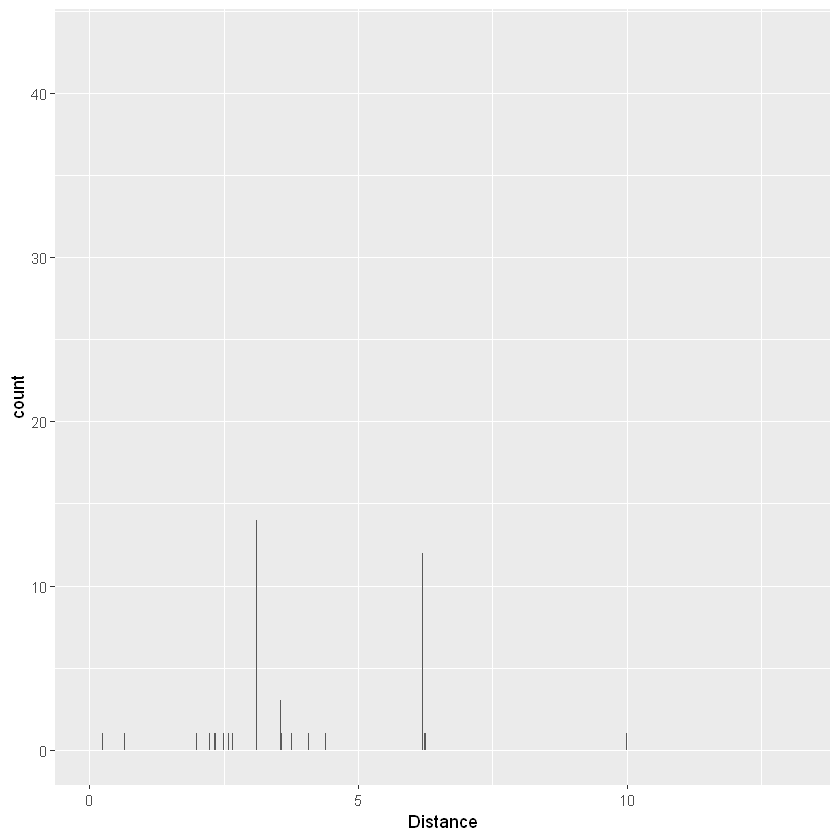

In [441]:
ggplot(data = mm22) +
  geom_bar(mapping = aes(x = Distance))

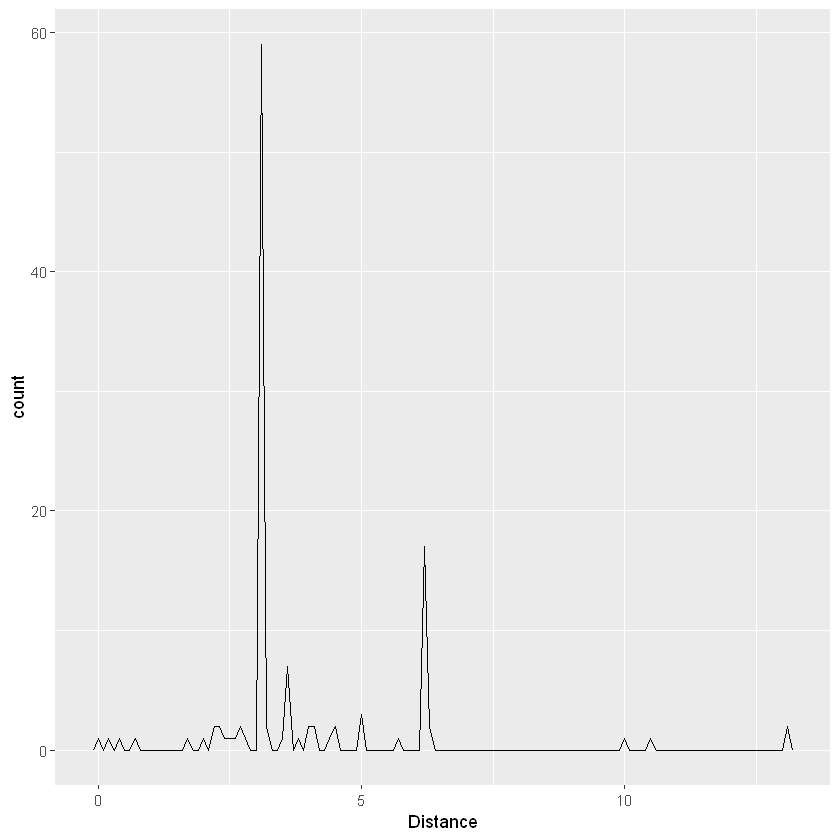

In [442]:
ggplot(data = mm22, mapping = aes(x = Distance, colour = duration)) +
  geom_freqpoly(binwidth = 0.1)

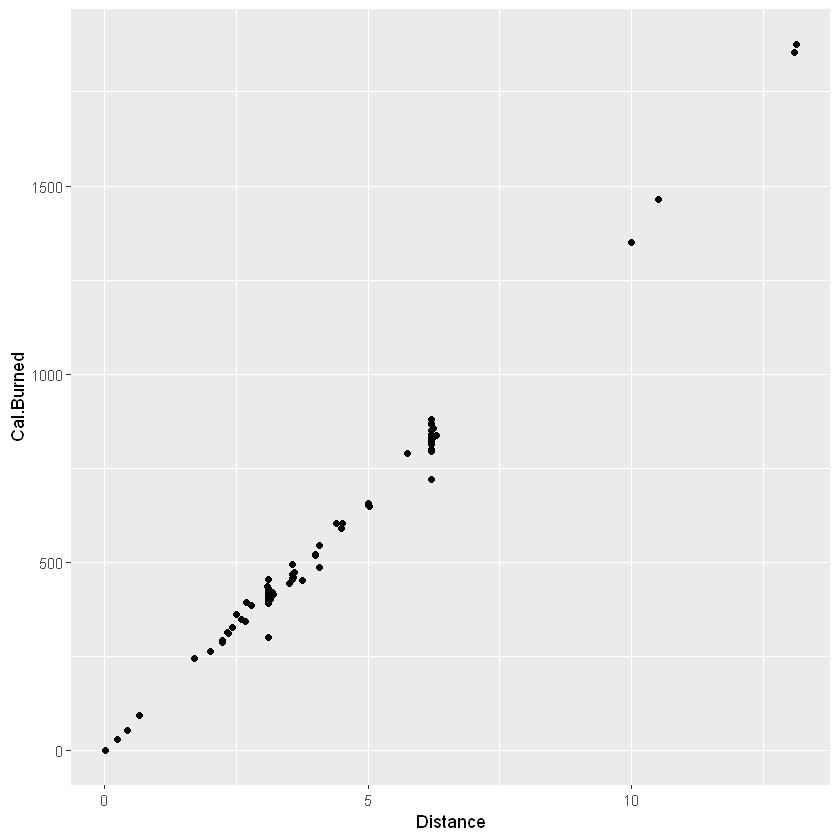

In [443]:
ggplot(data = mm22, mapping = aes(x = Distance, y = Cal.Burned)) + 
  geom_point()

In [444]:
cormat <- round(cor(mm22),2)
head(cormat)


,Distance,Duration,Activity.Score,duration,Steps.y,Max.Spd,Avg.HR,Avg.Spd,Cal.Burned
Distance,1.00,0.96,0.58,0.96,0.98,0.11,0.11,-0.06,1.00
Duration,0.96,1.00,0.54,1.00,0.97,0.15,0.13,-0.27,0.96
Activity.Score,0.58,0.54,1.00,0.54,0.56,0.17,0.23,-0.13,0.58
duration,0.96,1.00,0.54,1.00,0.97,0.15,0.13,-0.27,0.96
Steps.y,0.98,0.97,0.56,0.97,1.00,0.11,0.12,-0.16,0.98
Max.Spd,0.11,0.15,0.17,0.15,0.11,1.00,0.53,-0.15,0.10


In [445]:
#install.packages("reshape2")
library(reshape2)
melted_cormat <- melt(cormat)
head(melted_cormat)

,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,Distance,Distance,1.00
2,Duration,Distance,0.96
3,Activity.Score,Distance,0.58
4,duration,Distance,0.96
5,Steps.y,Distance,0.98
6,Max.Spd,Distance,0.11


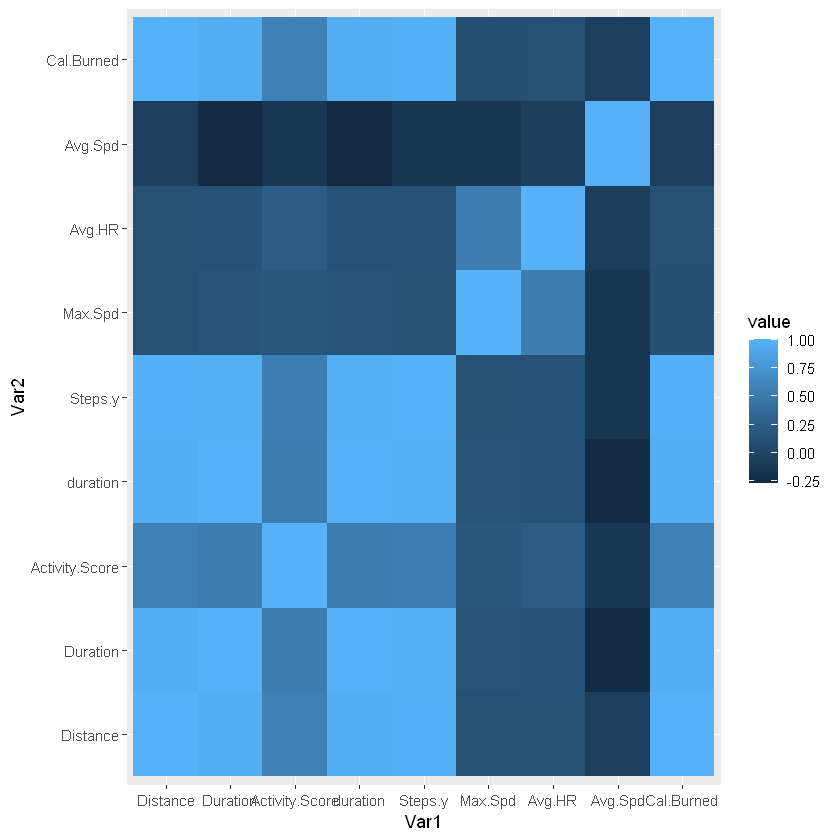

In [446]:
library(ggplot2)
ggplot(data = melted_cormat, aes(x=Var1, y=Var2, fill=value)) + 
  geom_tile()

In [447]:
linear_model <- lm(duration ~ Distance, data = mm22)

In [448]:
summary(linear_model)


Call:
lm(formula = duration ~ Distance, data = mm22)

Residuals:
   Min     1Q Median     3Q    Max 
-8.484 -2.826 -1.220  0.421 39.417 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -3.9238     1.3466  -2.914  0.00427 ** 
Distance     11.0876     0.3079  36.010  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.743 on 118 degrees of freedom
Multiple R-squared:  0.9166,	Adjusted R-squared:  0.9159 
F-statistic:  1297 on 1 and 118 DF,  p-value: < 2.2e-16


In [449]:
new_distance <- data.frame(
    Distance = c(15, 20, 26.2)   
)

pred <- predict(linear_model, new_distance, interval = "confidence")
pred

,fit,lwr,upr
1,162.3907,155.5075,169.2739
2,217.8289,207.9305,227.7273
3,286.5722,272.9143,300.2302


In [450]:
halftimes <- mm22[mm22$Distance > 13.09,]
halftimes2 <- mm23[mm23$Distance > 13.09,]


In [451]:
head(halftimes, 20)

,Distance,Duration,Activity.Score,duration,Steps.y,Max.Spd,Avg.HR,Avg.Spd,Cal.Burned
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
30,13.13,9540,133.30027,159.00,22488,44.43,148,4.96,1876
64,13.10,9189,50.27286,153.15,22087,88.30,156,5.13,1854


In [452]:
head(halftimes2, 20)

,Distance,Duration,Activity.Score,duration,Steps.y,Max.Spd,Avg.HR,Avg.Spd,Cal.Burned
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
30,13.13,9540,133.30027,159.00,22488,44.43,148,4.96,1876
64,13.10,9189,50.27286,153.15,22087,88.30,156,5.13,1854


In [453]:
mm23 <- mm22 %>%

  filter(!duplicated(cbind(Distance,  Duration, Cal.Burned)))

In [454]:
head(mm23, 20)

,Distance,Duration,Activity.Score,duration,Steps.y,Max.Spd,Avg.HR,Avg.Spd,Cal.Burned
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3.56,2143,76.51169,35.72,5720,24.99,146,5.98,469
2,3.56,2015,76.28970,33.58,5340,14.13,161,6.36,494
3,4.00,2164,72.41923,36.07,5790,0.00,0,6.65,521
4,4.00,2135,72.90169,35.58,5720,0.00,0,6.74,520
5,3.57,2012,72.83316,33.53,5405,62.79,150,6.38,457
6,4.40,2573,94.71112,42.88,6816,67.00,153,6.16,603
7,3.10,1581,57.62157,26.35,4257,0.00,0,7.06,402
8,3.10,1557,55.09420,25.95,4200,0.00,0,7.17,400
9,3.10,1800,57.93465,30.00,4796,10.75,148,6.21,403


In [455]:
linear_model$coefficients

(Intercept)    Distance 
  -3.923779   11.087635

In [456]:
mlr <- lm(Distance ~ duration + Steps.y, data = mm22)

In [457]:
summary(mlr)


Call:
lm(formula = Distance ~ duration + Steps.y, data = mm22)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.64277 -0.12806  0.02199  0.14889  1.39675 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.110e-01  6.514e-02   6.309 5.18e-09 ***
duration    -3.851e-03  6.161e-03  -0.625    0.533    
Steps.y      5.990e-04  4.157e-05  14.410  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.351 on 117 degrees of freedom
Multiple R-squared:  0.9699,	Adjusted R-squared:  0.9694 
F-statistic:  1888 on 2 and 117 DF,  p-value: < 2.2e-16


In [458]:
mlr$coefficients

(Intercept)      duration       Steps.y 
 0.4109864531 -0.0038506910  0.0005990194

In [459]:
#install.packages('mgcv')
library(mgcv)

`geom_smooth()` using formula 'y ~ x'



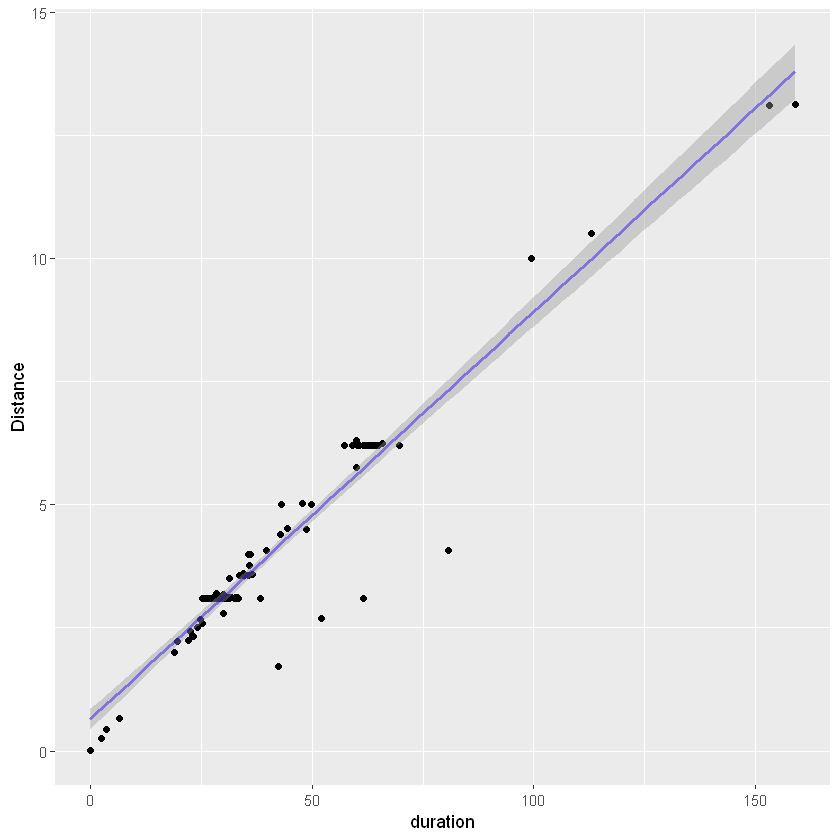

In [460]:
ggplot(mm22, aes(x = duration, y = Distance)) +
  geom_point() + 
  stat_smooth(method = "lm", col = "#1900fa6e")

In [209]:
score_model <- lm(duration ~ Distance, data = mm22)
mm22$predicted_duration <- predict(score_model, mm22$Distance)

ggplot(mm22, aes(x = duration, y = Distance)) +
  geom_smooth(method = "lm", se = FALSE, color = "red") +  # Plot regression slope
  geom_segment(aes(xend = duration, yend = predicted_duration), alpha = .2) +  # alpha to fade lines
  geom_point() +
  geom_point(aes(y = predicted_duration), shape = 1) +
  theme_bw()  # Add theme for cleaner look

ERROR: Error in model.frame.default(Terms, newdata, na.action = na.action, xlev = object$xlevels): 'data' must be a data.frame, environment, or list


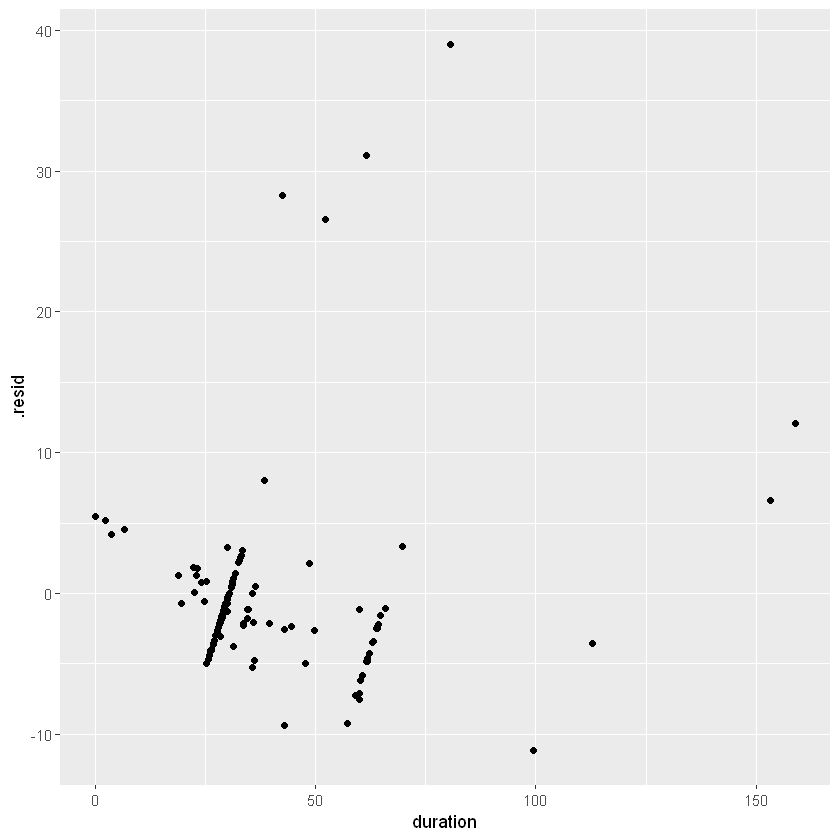

In [210]:
ggplot(lm(duration ~ Distance, data = mm22)) +
  geom_point(aes(x=duration, y=.resid))

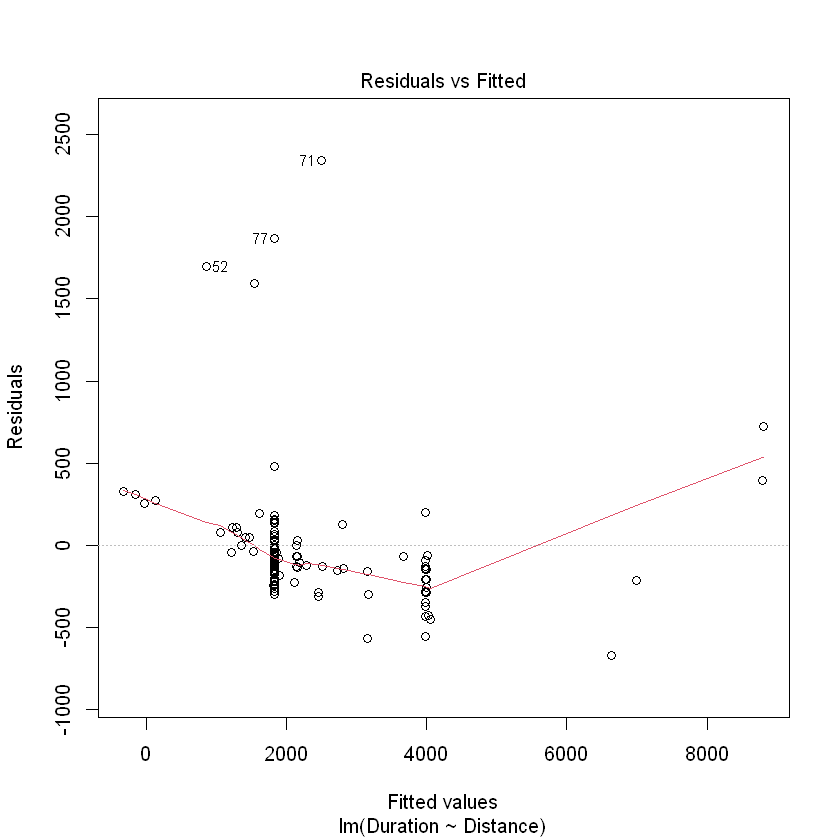

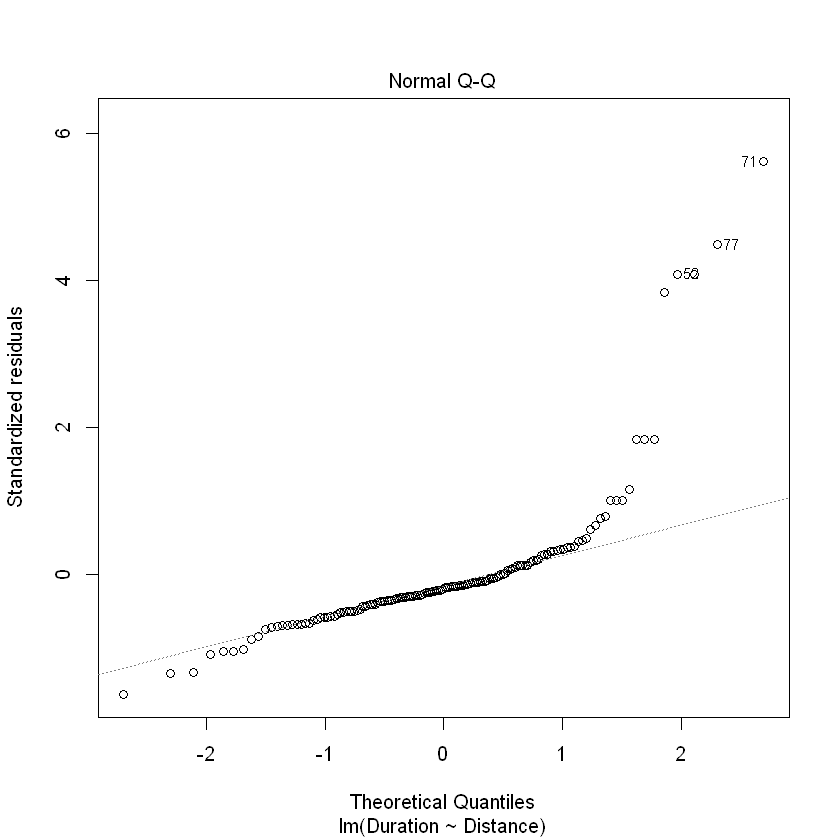

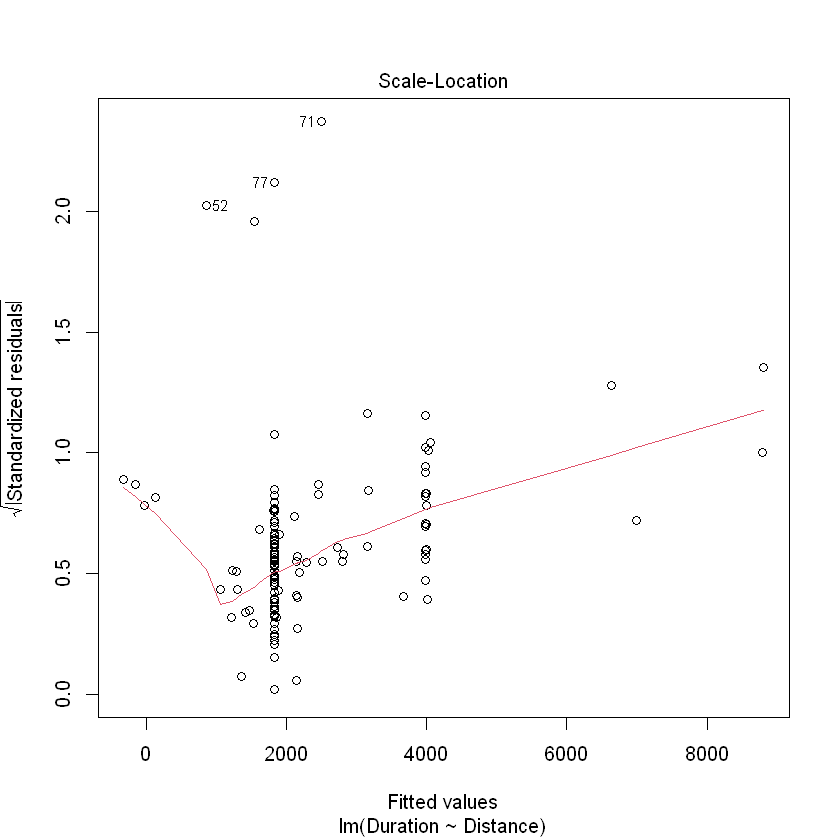

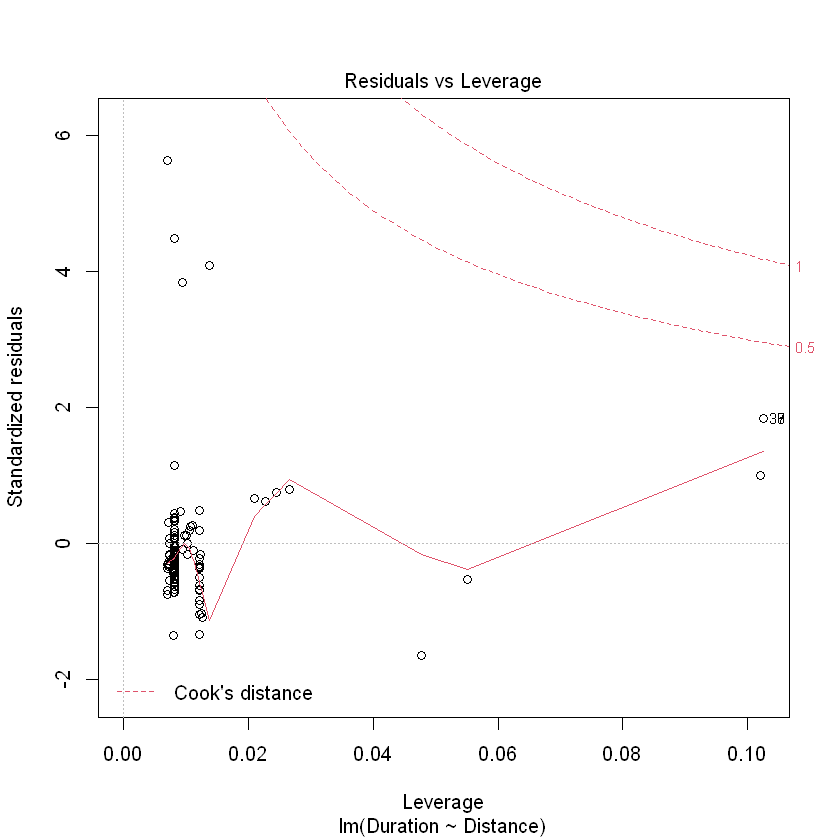

In [116]:
linear_model <- lm(Duration ~ Distance, data = mymerge)
plot(linear_model)

In [211]:
set.seed(20)
x <- seq(from=0, to=20, by=0.1)

# value to predict (y):
y <- 500 + 0.4 * (x-10)^3

# some noise is generated and added to the real signal (y):
noise <- rnorm(length(x), mean=10, sd=80)
noisy.y <- y + noise

`geom_smooth()` using formula 'y ~ x'



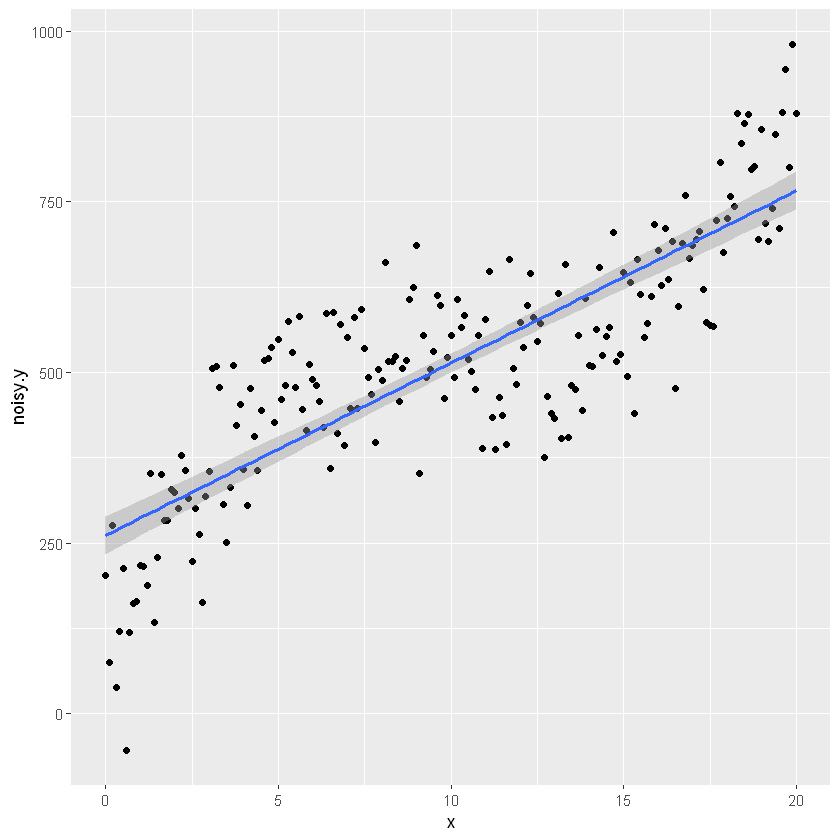

In [212]:
# fit linear model
ggplot(data=NULL,aes(x, noisy.y)) + 
    geom_point() + 
    geom_smooth(method = "lm")

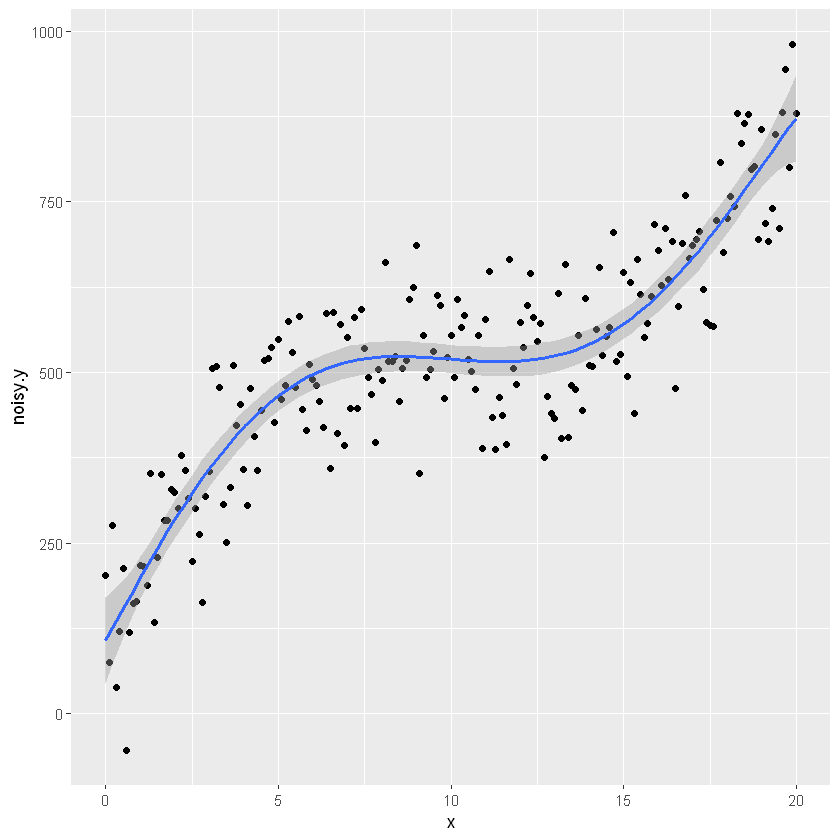

In [213]:
ggplot(data=NULL,aes(x, noisy.y)) + 
    geom_point() + 
    geom_smooth(method = "lm", formula = y ~ poly(x, 5))

In [217]:
linear_model <- lm(duration ~ Distance, mm22)

In [218]:
mse <- mean(linear_model$residuals^2)
mse

[1] 47.70027

In [219]:
rmse <- sqrt(mse)
rmse

[1] 6.906538

In [220]:
summary(linear_model)$r.squared

[1] 0.9435836

In [221]:
mlr <- lm(duration ~ Distance + Steps.y, data = mm22)

In [222]:
mse_mlr <- mean(mlr$residuals^2)
mse_mlr

[1] 27.48112

In [223]:
rmse_mlr <- sqrt(mse_mlr)
rmse_mlr

[1] 5.242244

In [224]:
summary(mlr)$r.squared

[1] 0.9674973

In [225]:
head(predict(score_model))

1        2        3        4        5        6 
35.69182 35.69182 40.80450 40.80450 35.80802 45.45238

In [153]:
#install.packages("rlang")
#install.packages("tidymodels")
#install.packages('devtools')
#install.packages('Rtools')
devtools::install_github("r-lib/rlang", build_vignettes = TRUE)


Please download and install Rtools 4.0 from https://cran.r-project.org/bin/windows/Rtools/.



Please download and install Rtools 4.0 from https://cran.r-project.org/bin/windows/Rtools/.


Please download and install Rtools 4.0 from https://cran.r-project.org/bin/windows/Rtools/.



ERROR: Error: Failed to install 'rlang' from GitHub:
  Could not find tools necessary to compile a package
Call `pkgbuild::check_build_tools(debug = TRUE)` to diagnose the problem.


In [152]:
# Library for modeling
library(tidymodels)

# Load tidyverse
library(tidyverse)

ERROR: Error: package or namespace load failed for 'tidymodels' in loadNamespace(i, c(lib.loc, .libPaths()), versionCheck = vI[[i]]):
 namespace 'rlang' 1.0.2 is already loaded, but >= 1.0.3 is required


In [132]:
head(mymerge)

,Date,Times,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,⋯,Max.Pace,Avg.Spd,Max.Spd,Avg.HR,Steps.y,duration,day,month,year,Miles
,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<fct>
1,2021-09-23,12:18:41,2021-09-23T12:59:29.798Z,WORKOUT,RUNNING,Automatic,-5,76.51169,2160000.0,269798.0,⋯,2.40,5.98,24.99,146,5720,35.72,Thursday,September,2021,"(3.09,6.21]"
2,2021-09-24,12:30:07,2021-09-24T13:13:14.739Z,WORKOUT,RUNNING,Automatic,-5,76.28969833333333,2040000.0,494739.0,⋯,4.25,6.36,14.13,161,5340,33.58,Friday,September,2021,"(3.09,6.21]"
3,2021-09-25,16:42:43,2021-09-25T17:20:33.052Z,WORKOUT,RUNNING,Automatic,-5,72.41923333333332,2133052.0,76050.0,⋯,0.00,6.65,0.00,0,5790,36.07,Saturday,September,2021,"(3.09,6.21]"
4,2021-09-26,15:24:57,2021-09-26T16:03:50.992Z,WORKOUT,RUNNING,Automatic,-5,72.90168750000001,2100000.0,170992.0,⋯,0.00,6.74,0.00,0,5720,35.58,Sunday,September,2021,"(3.09,6.21]"
5,2021-09-27,12:19:08,2021-09-27T12:58:47.413Z,WORKOUT,RUNNING,Automatic,-5,72.83315583333334,2040000.0,287413.0,⋯,0.96,6.38,62.79,150,5405,33.53,Monday,September,2021,"(3.09,6.21]"
6,2021-09-28,10:05:11,2021-09-28T10:56:40.224Z,WORKOUT,RUNNING,Automatic,-5,94.7111225,2640000.0,400224.0,⋯,0.90,6.16,67.00,153,6816,42.88,Tuesday,September,2021,"(3.09,6.21]"


In [136]:
smmg <- mymerge %>% select(c(Distance, duration, Activity.Score, Avg.HR, Steps.y))

In [137]:
head(smmg)

,Distance,duration,Activity.Score,Avg.HR,Steps.y
,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,3.56,35.72,76.51169,146,5720
2,3.56,33.58,76.28969833333333,161,5340
3,4.00,36.07,72.41923333333332,0,5790
4,4.00,35.58,72.90168750000001,0,5720
5,3.57,33.53,72.83315583333334,150,5405
6,4.40,42.88,94.7111225,153,6816


In [138]:
set.seed(1234)
flight_split <- initial_split(smmg)
train_data <- training(flight_split)
test_data <- testing(flight_split)

ERROR: Error in initial_split(smmg): could not find function "initial_split"


#### Extra

In [ ]:
# test <- read.csv("https://raw.githubusercontent.com/Cbhami/Coraline/master/Resources/csv%20data/user94403143_workout_history.csv", header=TRUE)

In [ ]:
# library(dplyr)
# library(tidyr)
# cadf <- cadf %>% separate(Start.Time, c('Date', 'Time'), "T")

In [ ]:
# cadf <- cadf %>% mutate(Date = as.Date(Date))

In [ ]:
# names(test)[names(test) == "Workout.Date"] <- "Date"


In [ ]:
# test$Workout.Date <- as.Date(test$Workout.Date, format = "%B %e, %Y")

In [ ]:
# mmerge2 <- merge(test, df, by = "Date", all.x=TRUE)

In [ ]:
head(mmerge2, 2)
mmerge2 <- as.data.frame(mmerge2)

ERROR: Error in head(mmerge2, 2): object 'mmerge2' not found


In [ ]:
mmerge2 <- mmerge2[order(mmerge2$Date, decreasing = TRUE),]

In [ ]:
mmerge2

,Date,Date.Submitted,Activity.Type,Calories.Burned..kCal.,Distance..mi.,Workout.Time..seconds.,Avg.Pace..min.mi.,Max.Pace..min.mi.,Avg.Speed..mi.h.,Max.Speed..mi.h.,⋯,Distance,Duration,Avg.Pace,Max.Pace,Avg.Spd,Max.Spd,Avg.HR,Steps.y,duration,year
,<date>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
676,2022-07-10,"July 10, 2022",Run,429,3.09815,2301,12.37320,0.993196,4.84920,60.4110,⋯,3.10,2301,12.37,0.990,4.85,60.41000,149.0000,5125,38.35,2022
675,2022-07-09,"July 9, 2022",Run,430,3.10009,2005,10.77380,1.166080,5.56904,51.4543,⋯,3.10,2005,10.77,1.170,5.57,51.45000,157.0000,5261,33.42,2022
674,2022-07-08,"July 8, 2022",Run,454,3.10995,1988,10.64940,3.878360,5.63410,15.4704,⋯,3.11,1988,10.65,3.880,5.63,15.47000,165.0000,5202,33.13,2022
673,2022-06-24,"June 24, 2022",Run,400,3.10000,1554,8.35484,0.000000,7.18147,0.0000,⋯,3.10,1554,8.35,4.026,7.18,52.59158,140.5377,4192,25.90,2022
672,2022-06-23,"June 23, 2022",Run,410,3.10000,1748,9.39785,0.000000,6.38444,0.0000,⋯,3.10,1748,9.40,4.026,6.38,52.59158,140.5377,4656,29.13,2022
671,2022-06-22,"June 21, 2022",Run,403,3.10000,1665,8.95161,0.000000,6.70270,0.0000,⋯,3.10,1665,8.95,4.026,6.70,52.59158,140.5377,4458,27.75,2022
670,2022-06-19,"June 19, 2022",Run,378,2.66000,1800,11.27820,0.000000,5.32000,0.0000,⋯,2.66,1800,11.28,4.026,5.32,52.59158,140.5377,4713,30.00,2022
669,2022-06-18,"June 18, 2022",Run,370,2.57857,1698,10.96610,1.112400,5.47140,53.9375,⋯,2.58,1698,10.97,1.110,5.47,53.94000,159.0000,4431,28.30,2022
668,2022-06-17,"June 16, 2022",Run,315,2.33000,1391,9.94993,0.000000,6.03019,0.0000,⋯,2.33,1391,9.95,4.026,6.03,52.59158,140.5377,3684,23.18,2022


In [ ]:
library(tidyr)
testdf2 <- mmerge2 %>% drop_na()

In [ ]:
testdf2

Date,Date.Submitted,Activity.Type,Calories.Burned..kCal.,Distance..mi.,Workout.Time..seconds.,Avg.Pace..min.mi.,Max.Pace..min.mi.,Avg.Speed..mi.h.,Max.Speed..mi.h.,⋯,Distance,Duration,Avg.Pace,Max.Pace,Avg.Spd,Max.Spd,Avg.HR,Steps.y,duration,year
<date>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
2022-07-10,"July 10, 2022",Run,429,3.09815,2301,12.37320,0.993196,4.84920,60.4110,⋯,3.10,2301,12.37,0.990,4.85,60.41000,149.0000,5125,38.35,2022
2022-07-09,"July 9, 2022",Run,430,3.10009,2005,10.77380,1.166080,5.56904,51.4543,⋯,3.10,2005,10.77,1.170,5.57,51.45000,157.0000,5261,33.42,2022
2022-07-08,"July 8, 2022",Run,454,3.10995,1988,10.64940,3.878360,5.63410,15.4704,⋯,3.11,1988,10.65,3.880,5.63,15.47000,165.0000,5202,33.13,2022
2022-06-18,"June 18, 2022",Run,370,2.57857,1698,10.96610,1.112400,5.47140,53.9375,⋯,2.58,1698,10.97,1.110,5.47,53.94000,159.0000,4431,28.30,2022
2022-06-12,"June 12, 2022",Run,428,3.09762,1955,10.51630,3.008140,5.70545,19.9459,⋯,3.10,1955,10.52,3.010,5.71,19.95000,140.5377,5052,32.58,2022
2022-06-10,"June 10, 2022",Run,881,6.20257,4182,11.23370,0.599692,5.34108,100.0510,⋯,6.20,4182,11.23,0.600,5.34,100.05000,153.0000,10479,69.70,2022
2022-06-08,"June 9, 2022",Run,407,3.11000,1702,9.12111,0.000000,6.57814,0.0000,⋯,3.11,1702,9.12,4.026,6.58,52.59158,153.0000,4548,28.37,2022
2022-06-06,"June 6, 2022",Run,590,4.50165,2924,10.82230,1.146470,5.54409,52.3344,⋯,4.50,2924,10.82,1.150,5.54,52.33000,145.0000,7739,48.73,2022
2022-06-05,"June 5, 2022",Walk,253,1.88061,2402,21.27700,1.791470,2.81995,33.4920,⋯,1.88,2402,21.28,1.790,2.82,33.49000,109.0000,3994,40.03,2022


In [ ]:
library(tidyr)
test <- separate(test, Time, c('Times', 'Ms'), "[.]")

In [ ]:
library("lubridate")
hours <- -3600 * mymerge$Local.Time.Zone.Offset
mymerge$my_date_time1 <- mymerge$DTS + (-3600 * mymerge$Local.Time.Zone.Offset)